In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load CSV file into a DataFrame
df_sales = pd.read_csv('Processed/data_clean.csv')[['date', 'item_nbr', 'unit_sales']]
df_items = pd.read_csv('Processed/items_clean.csv')[['item_nbr', 'Price']]
df_oil_M = pd.read_csv('Processed/oil(india)_monthly_clean.csv') #date (y-m), unit, price, change, price_per_unit
df_oil_D = pd.read_csv('Pre-processed/alfredgraph.csv')[['date','dcoilwtico']] #date, dcoilwtico
df['dcoilwtico'] = pd.to_numeric(df['dcoilwtico'], errors='coerce')

# Merge items
df = pd.merge(df_sales, df_items, on='item_nbr')

# Add total sales
df['total_sales'] = df['unit_sales'] * df['Price']
df = df.groupby('date')['total_sales'].sum().reset_index()


# Merge oil daily
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.date
df_oil_D['date'] = pd.to_datetime(df_oil_D['date']) #, format='%Y-%b-%d')
df_oil_D['date'] = df_oil_D['date'].dt.date

df = pd.merge(df, df_oil_D, on='date', how='left')


df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df_oil_M['date'] = pd.to_datetime(df_oil_M['date'])
df_oil_M['month'] = df_oil_M['date'].dt.month
df_oil_M['year'] = df_oil_M['date'].dt.year
df = pd.merge(df, df_oil_M, on=['month', 'year'], suffixes=('', '_oil_M'))
df.drop(['month', 'year'], axis=1, inplace=True)
df = df[['date','total_sales','dcoilwtico','price_per_unit']]
display(df)



,date,total_sales,dcoilwtico,price_per_unit
0,2013-01-01,281.384690,.,141.66
1,2013-01-02,61027.219131,93.14,141.66
2,2013-01-03,46408.703473,92.97,141.66
3,2013-01-04,41268.117176,93.12,141.66
4,2013-01-05,62470.050970,NaN,141.66
...,...,...,...,...
1679,2017-08-11,134081.776852,48.81,64.82
1680,2017-08-12,92830.604442,NaN,64.82
1681,2017-08-13,105941.589095,NaN,64.82
1682,2017-08-14,116687.542837,47.59,64.82


In [89]:
copy_df = df # Save

In [108]:
df = copy_df # Get df
display(df)

,total_sales,dcoilwtico,price_per_unit
date,,,
2013-01-01,281.384690,NaN,141.66
2013-01-02,61027.219131,93.14,141.66
2013-01-03,46408.703473,92.97,141.66
2013-01-04,41268.117176,93.12,141.66
2013-01-05,62470.050970,NaN,141.66
...,...,...,...
2017-08-11,134081.776852,48.81,64.82
2017-08-12,92830.604442,NaN,64.82
2017-08-13,105941.589095,NaN,64.82


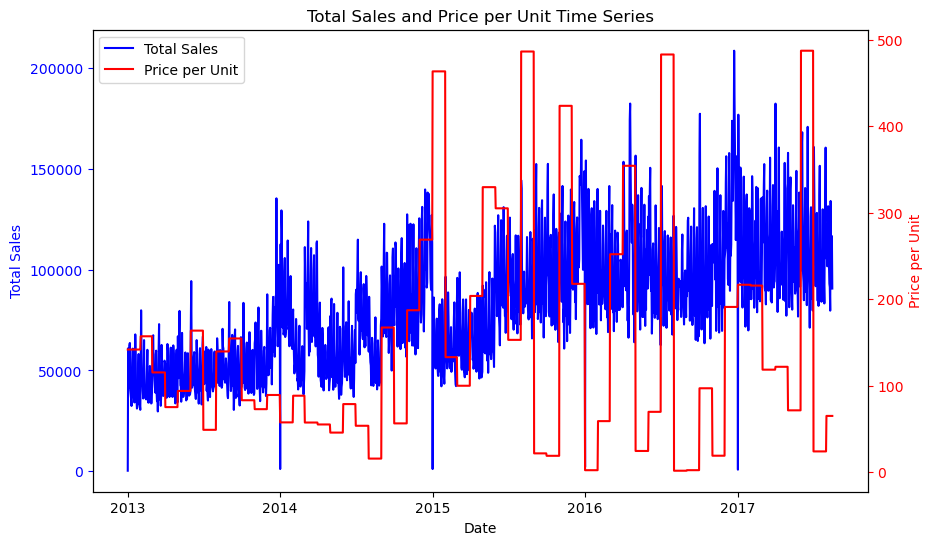

In [109]:
import matplotlib.pyplot as plt

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot total_sales on primary y-axis
ax1.plot(df.index, df['total_sales'], label='Total Sales', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Sales', color='blue')
ax1.tick_params('y', colors='blue')

# Create a secondary y-axis for price_per_unit
ax2 = ax1.twinx()
ax2.plot(df.index, df['price_per_unit'], label='Price per Unit', color='red')
ax2.set_ylabel('Price per Unit', color='red')
ax2.tick_params('y', colors='red')

# Add legend
lines = ax1.get_lines() + ax2.get_lines()
ax1.legend(lines, [line.get_label() for line in lines], loc='upper left')

# Title
plt.title('Total Sales and Price per Unit Time Series')

# Show plot
plt.show()


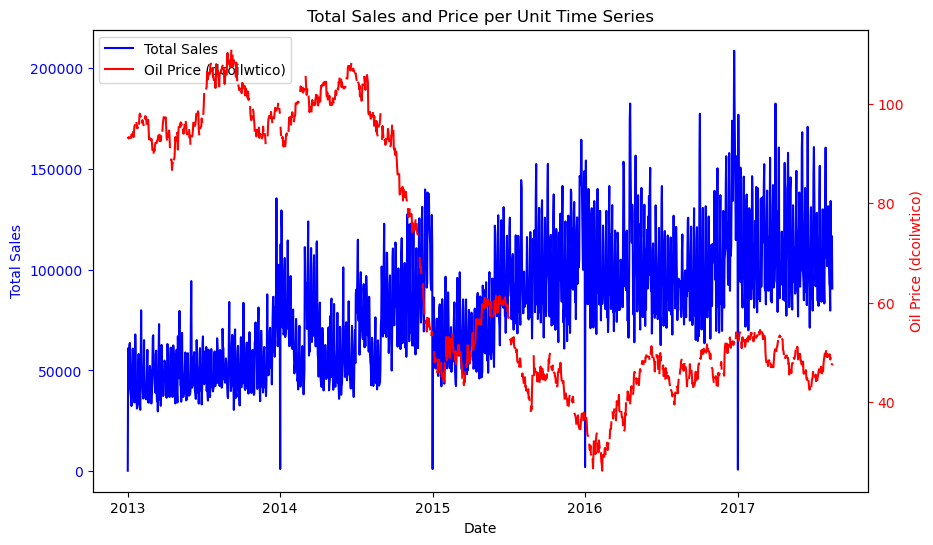

In [110]:
import matplotlib.pyplot as plt

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot total_sales on primary y-axis
ax1.plot(df.index, df['total_sales'], label='Total Sales', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Sales', color='blue')
ax1.tick_params('y', colors='blue')

# Create a secondary y-axis for dcoilwtico
ax2 = ax1.twinx()
ax2.plot(df.index, df['dcoilwtico'], label='Oil Price (dcoilwtico)', color='red')
ax2.set_ylabel('Oil Price (dcoilwtico)', color='red')
ax2.tick_params('y', colors='red')

# Add legend
lines = ax1.get_lines() + ax2.get_lines()
ax1.legend(lines, [line.get_label() for line in lines], loc='upper left')

# Title
plt.title('Total Sales and Price per Unit Time Series')

# Show plot
plt.show()


Correlation coefficient between total sales and price per unit: 0.14526483000245113
Correlation coefficient between total sales and dcoilwtico: -0.6721889588633093


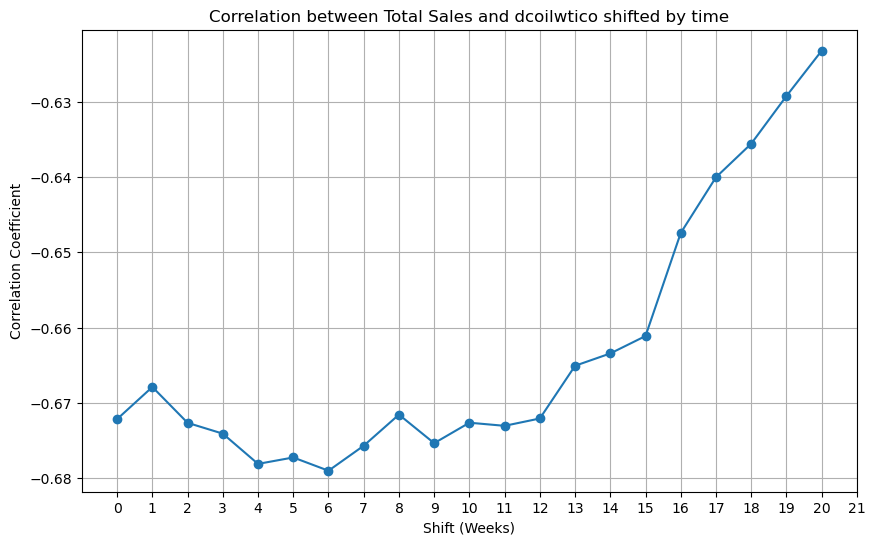

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate the correlation coefficient
correlation = df['total_sales'].corr(df['price_per_unit'])
print("Correlation coefficient between total sales and price per unit:", correlation)

# Calculate the correlation coefficient
correlation = df['total_sales'].corr(df['dcoilwtico'])
print("Correlation coefficient between total sales and dcoilwtico:", correlation)

# Define the number of weeks to shift
shift_values = np.arange(0, 21)

# List to store correlation coefficients
correlation_values = []

# Loop through each shift value
for shift_value in shift_values:
    # Shift 'dcoilwtico' by the current shift value
    shifted_dcoilwtico = df['dcoilwtico'].shift(periods=-shift_value*7)
    
    # Calculate the correlation coefficient
    correlation_shifted = df['total_sales'].corr(shifted_dcoilwtico)
    
    # Append the correlation coefficient to the list
    correlation_values.append(correlation_shifted)

# Plot the correlation coefficients shifted by time
plt.figure(figsize=(10, 6))
plt.plot(shift_values, correlation_values, marker='o')
plt.xlabel('Shift (Weeks)')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation between Total Sales and dcoilwtico shifted by time')
plt.grid(True)
plt.xticks(np.arange(0, 22, 1))
plt.show()



# Total Sales and Price per Unit:

The correlation coefficient of 0.145 indicates a very weak positive linear relationship between total sales and price per unit.
This suggests that there is almost no linear relationship between total sales and price per unit. In other words, changes in price per unit are not strongly associated with changes in total sales.
Total Sales and Oil Price (dcoilwtico):

The correlation coefficient of -0.672 indicates a moderate negative linear relationship between total sales and oil price (dcoilwtico).
This suggests that there is a moderate inverse relationship between total sales and oil price. In other words, as the oil price decreases, total sales tend to increase, and vice versa.
